In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io.arff import loadarff 

#Funções de avaliação dos modelos
from sklearn.metrics import (
    classification_report,
    plot_confusion_matrix,
    plot_roc_curve,
    accuracy_score,
)
from sklearn.model_selection import(
    train_test_split, 
    cross_val_predict,
    KFold,
)

#utils
from utils.num import Num
from utils.run_models import RunModels

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [3]:
# plot multiple numbers

def plot_images(images):
    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i], cmap='gray_r')
        ax.axis('off')

In [4]:
# loading data
raw_data = loadarff('mnist_784.arff')
df = pd.DataFrame(raw_data[0])

<BarContainer object of 10 artists>

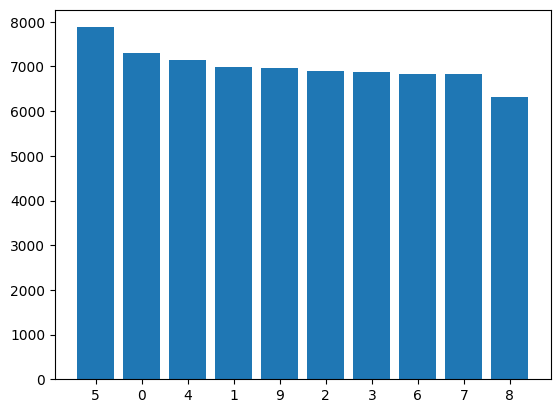

In [5]:
# numbers distribution
plt.bar(x = df['class'].unique(), height = df['class'].value_counts())

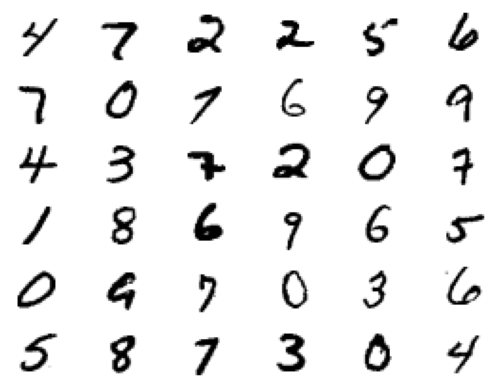

In [6]:
# Visualizando algumas instância do dataset

nums = df['class'].unique()

imgs = list()

for i in np.random.randint(1000, size=36):
    rnd_choice = np.random.choice(nums)
    p = pd.array(
        df[df['class'] == rnd_choice].iloc[i][:-1],
        dtype=int,
    ).reshape((28,28))
    
    imgs.append(p)

plot_images(imgs)


In [7]:
# Separando dataset

#validação
portion_to_validate = 0.1
df_validation = df.sample(frac = portion_to_validate)
df = df.drop(df_validation.index)

# treino e teste
X = df.iloc[:, 0:-1]
y = df.iloc[:, [-1]].astype('int') # target

kf = KFold(n_splits=10)
fold = 0

# Treinando os modelos

models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    # 'Perceptron': Perceptron(),
    # 'MLP': MLPClassifier(),
    # 'SVM': svm.SVC(),
}

trained_models = dict()
for train, test in kf.split(X,y):
    run = RunModels(models)
    run.load_data(X.iloc[train], X.iloc[test],
                  y.iloc[train], y.iloc[test])
    run.train()
    run.accuracy()

    trained_models[f'fold_{fold}'] = run

    print(f'Fold {fold}: {run.get_accuracy()}')
    fold += 1

Fold 0: {'KNN': 0.9715873015873016, 'Decision Tree': 0.8796825396825397, 'GaussianNB': 0.5566666666666666, 'MultinomialNB': 0.8314285714285714}
Fold 1: {'KNN': 0.9680952380952381, 'Decision Tree': 0.8741269841269841, 'GaussianNB': 0.5658730158730159, 'MultinomialNB': 0.8177777777777778}
Fold 2: {'KNN': 0.9692063492063492, 'Decision Tree': 0.8685714285714285, 'GaussianNB': 0.5680952380952381, 'MultinomialNB': 0.8146031746031746}
Fold 3: {'KNN': 0.9726984126984127, 'Decision Tree': 0.8725396825396825, 'GaussianNB': 0.5588888888888889, 'MultinomialNB': 0.8201587301587302}
Fold 4: {'KNN': 0.9709523809523809, 'Decision Tree': 0.8634920634920635, 'GaussianNB': 0.5558730158730159, 'MultinomialNB': 0.8117460317460318}
Fold 5: {'KNN': 0.9717460317460317, 'Decision Tree': 0.8588888888888889, 'GaussianNB': 0.5604761904761905, 'MultinomialNB': 0.8315873015873015}
Fold 6: {'KNN': 0.9671428571428572, 'Decision Tree': 0.8666666666666667, 'GaussianNB': 0.5473015873015873, 'MultinomialNB': 0.8273015873

{'KNN': 0.976031746031746,
 'Decision Tree': 0.8901587301587301,
 'GaussianNB': 0.5719047619047619,
 'MultinomialNB': 0.8538095238095238}

In [8]:
def acc_resume(fold_scores: dict) -> dict:
    for score in fold_scores:
        
        

    
for f,m in trained_models.items():

fold_0
{'GaussianNB': 0.5566666666666666}
fold_1
{'GaussianNB': 0.5658730158730159}
fold_2
{'GaussianNB': 0.5680952380952381}
fold_3
{'GaussianNB': 0.5588888888888889}
fold_4
{'GaussianNB': 0.5558730158730159}
fold_5
{'GaussianNB': 0.5604761904761905}
fold_6
{'GaussianNB': 0.5473015873015873}
fold_7
{'GaussianNB': 0.5501587301587302}
fold_8
{'GaussianNB': 0.5533333333333333}
fold_9
{'GaussianNB': 0.5719047619047619}


## Brincando com nossos números

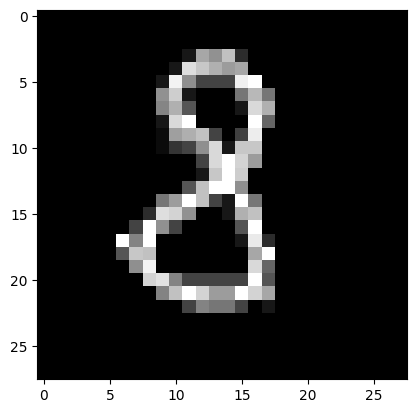

array([3])

In [9]:
# Testando número
num = Num('imgs/oito.png', invert=True)
num.plot()
run.models['KNN'].predict(num.to_array())